In [ ]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


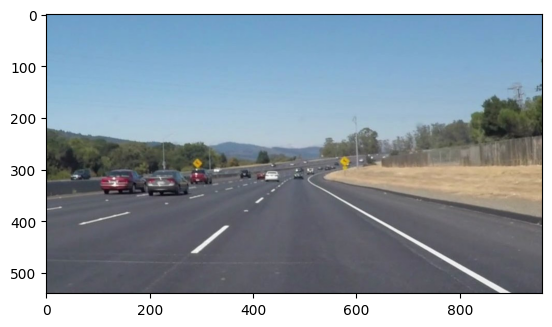

In [ ]:
#reading in an image
image = mpimg.imread('/content/drive/MyDrive/AVS/solidWhiteCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)  # if you wanted to show a single color channel image called 'gray', for example, call as plt.imshow(gray, cmap='gray'

In [ ]:
def region_of_interest(img, vertices):
    # Define a blank matrix that matches the image height/width.
    mask = np.zeros_like(img)
    # Retrieve the number of color channels of the image.
    channel_count = img.shape[2]
    # Create a match color with the same color channel counts.
    match_mask_color = (255,) * channel_count

    # Fill inside the polygon
    cv2.fillPoly(mask, vertices, match_mask_color)

    # Returning the image only where mask pixels match
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

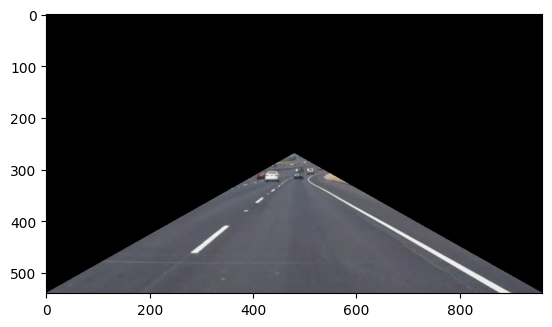

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

h = image.shape[0]
w = image.shape[1]
region_of_interest_vertices = [
    (0, h),
    (w / 2, h / 2),
    (w, h)
]
#image = mpimg.imread('solidWhiteCurve.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image)
plt.show()

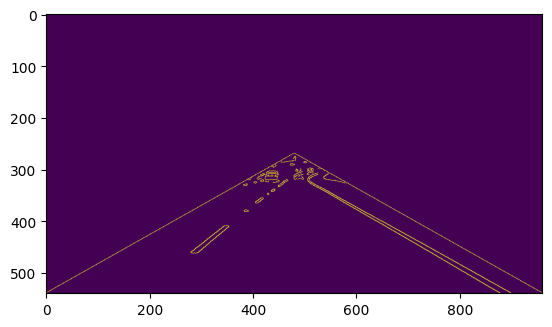

In [ ]:
# Convert to grayscale here.
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
cannyed_image = cv2.Canny(gray_image, 100, 200)
plt.figure()
plt.imshow(cannyed_image)
plt.show()


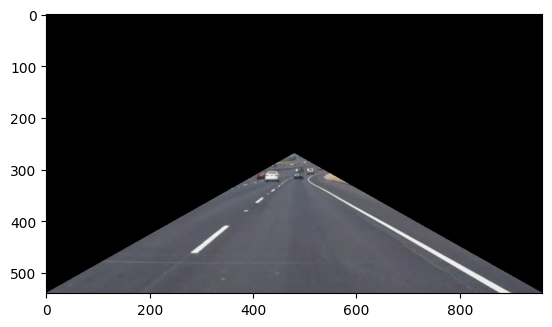

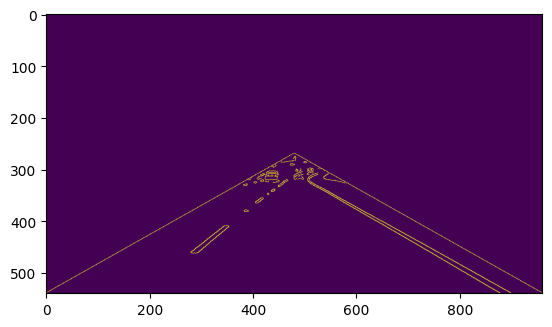

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, h),
    (w / 2, h / 2),
    (w, h),
]
#image = mpimg.imread('solidWhiteCurve.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image)
# Convert to grayscale here.
gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_RGB2GRAY)
# Call Canny Edge Detection here.
cannyed_image = cv2.Canny(gray_image, 100, 200)
plt.figure()
plt.imshow(cannyed_image)
plt.show()

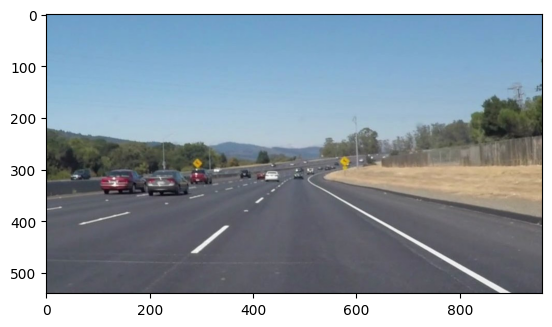

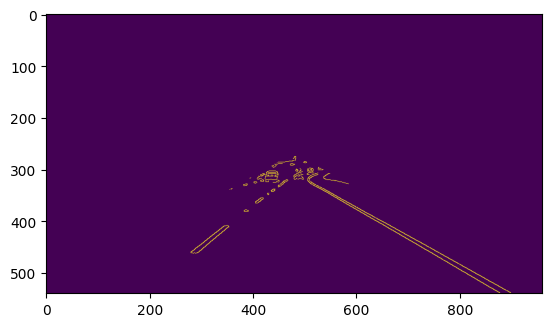

In [ ]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255 # <-- This line altered for grayscale.

    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, h),
    (w / 2, h / 2),
    (w, h),
]
#image = mpimg.imread('solidWhiteCurve.jpg')
plt.figure()
plt.imshow(image)
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
# Moved the cropping operation to the end of the pipeline.
cropped_image = region_of_interest(
    cannyed_image,
    np.array([region_of_interest_vertices], np.int32)
)
plt.figure()
plt.imshow(cropped_image)
plt.show()

In [ ]:
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
print(lines)

[[[482 311 878 539]]

 [[484 310 812 500]]

 [[463 286 514 316]]

 [[464 286 515 315]]

 [[724 441 833 503]]

 [[383 380 486 305]]

 [[617 384 675 414]]

 [[387 382 490 307]]

 [[787 476 889 534]]

 [[487 313 562 352]]

 [[281 459 350 409]]

 [[388 382 504 288]]

 [[386 382 504 287]]

 [[548 344 624 387]]]


In [ ]:
import cv2
import numpy as np

def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # If there are no lines to draw, return the original image.
    if lines is None:
        return img

    # Make a copy of the original image.
    img = np.copy(img)

    # Create a blank image with the same size as the original image.
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)

    # Merge the line image onto the original image using addWeighted for blending.
    img = cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)

    # Return the modified image.
    return img


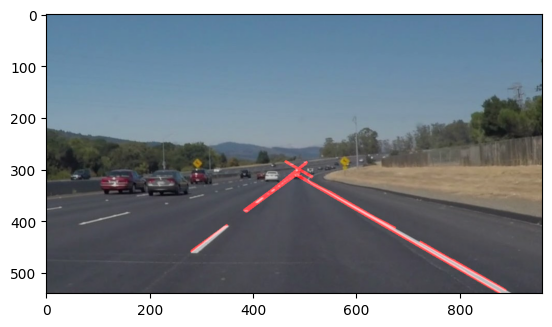

In [ ]:
line_image = draw_lines(image, lines) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()

In [ ]:
left_line_x = []
left_line_y = []
right_line_x = []
right_line_y = []
for line in lines:
    for x1, y1, x2, y2 in line:
        slope = (y2 - y1) / (x2 - x1) # <-- Calculating the slope.
        if math.fabs(slope) < 0.5: # <-- Only consider extreme slope
            continue
        if slope <= 0: # <-- If the slope is negative, left group.
            left_line_x.extend([x1, x2])
            left_line_y.extend([y1, y2])
        else: # <-- Otherwise, right group.
            right_line_x.extend([x1, x2])
            right_line_y.extend([y1, y2])
min_y = image.shape[0] * (3 / 5) # <-- Just below the horizon
max_y = image.shape[0] # <-- The bottom of the image
poly_left = np.poly1d(np.polyfit(
    left_line_y,
    left_line_x,
    deg=1
))
left_x_start = int(poly_left(max_y))
left_x_end = int(poly_left(min_y))
poly_right = np.poly1d(np.polyfit(
    right_line_y,
    right_line_x,
    deg=1
))
right_x_start = int(poly_right(max_y))
right_x_end = int(poly_right(min_y))
line_image = draw_lines(
    image,
    [[
        [left_x_start, max_y, left_x_end, min_y],
        [right_x_start, max_y, right_x_end, min_y],
    ]],
    thickness=5,
)
plt.figure()
plt.imshow(line_image)
plt.show()

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'line'
> Overload resolution failed:
>  - Can't parse 'pt2'. Sequence item with index 1 has a wrong type
>  - Can't parse 'pt2'. Sequence item with index 1 has a wrong type


In [ ]:
import cv2
import numpy as np
import math

def region_of_interest(img, vertices):
    # Create a mask to keep only the region of interest
    mask = np.zeros_like(img)
    match_mask_color = 255
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # Function to draw lines on an image
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    if lines is None:
        return img  # Return original image if no lines are found
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    return cv2.addWeighted(img, 0.8, line_img, 1.0, 0.0)

def pipeline(image):
    """
    Lane detection pipeline that processes an image and adds lane lines.
    """
    height = image.shape[0]
    width = image.shape[1]

    # Define region of interest vertices (triangle shape)
    region_of_interest_vertices = [
        (0, height),
        (width / 2, height / 2),
        (width, height),
    ]

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Apply Canny edge detection
    cannyed_image = cv2.Canny(gray_image, 100, 200)

    # Mask out the region outside the ROI
    cropped_image = region_of_interest(cannyed_image, np.array([region_of_interest_vertices], np.int32))

    # Detect lines using Hough Transform
    lines = cv2.HoughLinesP(
        cropped_image,
        rho=6,
        theta=np.pi / 60,
        threshold=160,
        lines=np.array([]),
        minLineLength=40,
        maxLineGap=25
    )

    # If no lines were detected, return the original image
    if lines is None:
        return image

    # Separate the lines into left and right lines based on their slope
    left_line_x = []
    left_line_y = []
    right_line_x = []
    right_line_y = []

    for line in lines:
        for x1, y1, x2, y2 in line:
            # Calculate the slope of each line
            slope = (y2 - y1) / (x2 - x1)

            # Ignore lines with a very small slope (likely horizontal lines or noise)
            if math.fabs(slope) < 0.5:
                continue

            # Split lines into left and right based on slope
            if slope <= 0:
                left_line_x.extend([x1, x2])
                left_line_y.extend([y1, y2])
            else:
                right_line_x.extend([x1, x2])
                right_line_y.extend([y1, y2])

    # Define the region of the image where we expect to see the lanes
    min_y = int(image.shape[0] * (3 / 5))
    max_y = int(image.shape[0])

    # Fit polynomial lines to the left and right lane points
    poly_left = np.poly1d(np.polyfit(left_line_y, left_line_x, deg=1))
    poly_right = np.poly1d(np.polyfit(right_line_y, right_line_x, deg=1))

    # Define the start and end points for both left and right lanes
    left_x_start = int(poly_left(max_y))
    left_x_end = int(poly_left(min_y))

    right_x_start = int(poly_right(max_y))
    right_x_end = int(poly_right(min_y))

    # Prepare the lines to be drawn
    line_image = draw_lines(
        image,
        [
            [[left_x_start, max_y, left_x_end, min_y]],
            [[right_x_start, max_y, right_x_end, min_y]]
        ],
        thickness=5
    )

    return line_image


This image is: <class 'numpy.ndarray'> with dimensions: (540, 960, 3)


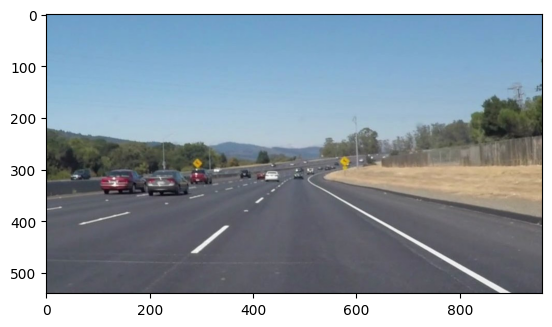

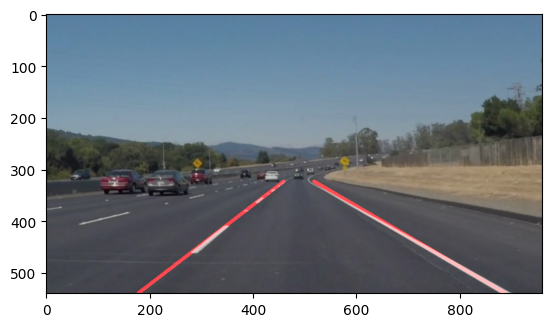

In [ ]:
#reading in an image
image = mpimg.imread('/content/drive/MyDrive/AVS/solidWhiteCurve.jpg')

#printing out some stats and plotting
print('This image is:', type(image), 'with dimensions:', image.shape)
plt.imshow(image)

lanes = pipeline(image)
plt.figure()
plt.imshow(lanes)
plt.show()